In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [28]:
df=pd.read_csv(r'C:\Users\Vikas\Downloads\areamultiplevariable.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


in this dataframe bedrooms contain one NaN value so first fill with som number

Data processing:-Fill NA values with median value of a column

In [29]:
df.bedrooms.median() #it is float value so need to convert into integer

4.0

In [30]:
import math
median_bedrooms=math.floor(df.bedrooms.median()) #use imort math to convert into integer
median_bedrooms

4

In [31]:
#here,we fill theNan value with median value
print(df.bedrooms.fillna(median_bedrooms))

0    3.0
1    4.0
2    4.0
3    3.0
4    5.0
5    6.0
Name: bedrooms, dtype: float64


In [8]:
#now we store or assign this value in original data frame
df.bedrooms=df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


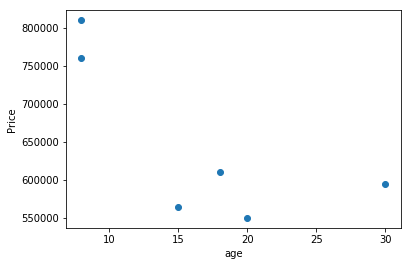

In [9]:
#show the price with age
plt.scatter(x='age',y='price',data=df)
plt.xlabel('age',fontsize=10)
plt.ylabel('Price',fontsize=10)
plt.show()

In [10]:
#x=df[['area','bedrooms','age']] #features variable
#y=df['price'] #response or target variable

In [11]:
#now we predict the homeprice in linear regression because there is no NaN value
mulreg=LinearRegression()
mulreg.fit(df[['area','bedrooms','age']],df['price']) #here price is response or target variable because e predict price
#mulreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
#now we find the coefficient
mulreg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

here,these are the coefficient value of m1,m2,m3

In [13]:
#now we find the intercept
mulreg.intercept_

221323.0018654043

Now my linear regression formula is 
<li>.price=m1*area+m2*bedrooms+m3*age+b ,here m1,m2,m3 are coefficient.
<li> now we predict the price using coeficient and intercept

# Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old

In [14]:
#here,we predict or find the price of 3000 ft area,3bedrooms,40 year age
mulreg.predict([[3000,3,40]]) 

array([498408.25158031])

In [15]:
#now we check my prediction is correct or not
#price=m1*area+m2*bedrooms+m3*age+b
112.06244194*3000+23388.88007794*3+-3231.71790863*40+221323.0018654043


498408.2515740243

# Find price of home with 2500 sqr ft area, 4 bedrooms, 5 year old

In [16]:
mulreg.predict([[2500,4,5]])

array([578876.03748933])

# Exercise

In this exercise there is hiring.csv. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,
<li>2 yr experience, 9 test score, 6 interview score
<li>12 yr experience, 10 test score, 10 interview score

In [17]:
sal=pd.read_csv(r'C:\Users\Vikas\Downloads\exercisesalary.csv')
sal

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [18]:
sal.experience.fillna('zero')

0      zero
1      zero
2      five
3       two
4     seven
5     three
6       ten
7    eleven
Name: experience, dtype: object

In [19]:
#now we assign these fillna value into original dataframe
sal.experience=sal.experience.fillna('zero')
sal

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


here,experience are in the form of word,so we need to convert these word into number


In [20]:
# through word2number we can convert word into number
from word2number import w2n
sal.experience.apply(w2n.word_to_num)

0     0
1     0
2     5
3     2
4     7
5     3
6    10
7    11
Name: experience, dtype: int64

In [21]:
#now we store these value in a original data set
sal.experience=sal.experience.apply(w2n.word_to_num)
sal

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


here we see that in test score ther is one NaN value so,first fillup with mean,or median

In [35]:
sal['test_score(out of 10)'].mean()

7.857142857142857

it's a float value so we need to convert them into integer

In [36]:
import math
mean_testscore=math.floor(sal['test_score(out of 10)'].mean())
mean_testscore

7

In [37]:
#now fill the NaN value with these mean value
sal['test_score(out of 10)'].fillna(mean_testscore)

0     8.0
1     8.0
2     6.0
3    10.0
4     9.0
5     7.0
6     7.0
7     7.0
Name: test_score(out of 10), dtype: float64

In [38]:
#now store these value into original dataset
sal['test_score(out of 10)']=sal['test_score(out of 10)'].fillna(mean_testscore)
sal

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [39]:
#whenever we going to use any regression model we need x nd y value
x=sal.iloc[:,0:3]
y=sal.iloc[:,3]

In [40]:
from sklearn.linear_model import LinearRegression
linsal=LinearRegression() #create the object of class
linsal.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
#now i am going to predict the salary on follwing question
#2 yr experience, 9 test score, 6 interview score
print('The salary of 2 yr experience, 9 test score, 6 interview score are:-',linsal.predict([[2,9,6]]))


The salary of 2 yr experience, 9 test score, 6 interview score are:- [53713.86677124]


In [43]:
#12 yr experience, 10 test score, 10 interview score
linsal.predict([[12,10,10]])

array([93747.79628651])